In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
df= pd.read_csv("Car_Data.csv")
print("columns:",df.columns)
print(df.head(50))
print(df.info())

columns: Index(['ID', 'Brand', 'Model', 'Year', 'Color', 'Mileage', 'Price',
       'Condition'],
      dtype='object')
    ID          Brand            Model  Year   Color  Mileage  Price Condition
0    1          Mazda  Generic Model 3  2003    Blue    22932  65732       New
1    2         Jaguar  Generic Model 2  2003  Silver    89937  58620       New
2    3     Land Rover  Generic Model 2  2022   Green    36616  50574       New
3    4        Porsche  Generic Model 2  1997   Black    82812  35436      Used
4    5     Land Rover  Generic Model 3  2000   Black   184616  63880      Used
5    6        Porsche  Generic Model 2  1997    Blue    96785  42794       New
6    7          Volvo  Generic Model 3  2003  Silver   177385  58082      Used
7    8      Chevrolet  Generic Model 3  1997    Blue    47226  31079      Used
8    9           Ford            Focus  2003   Black   176272  59437      Used
9   10        Hyundai  Generic Model 3  2014  Silver     6153  27767       New
10  11     

In [17]:
# check duplicate rows

In [19]:
duplicates = df.duplicated()
print("total duplicates:",duplicates.sum())

total duplicates: 0


In [21]:
# show duplicate entries (if any)

In [23]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [ID, Brand, Model, Year, Color, Mileage, Price, Condition]
Index: []


In [25]:
# drop duplicates

In [27]:
df.drop_duplicates(inplace=True)

In [29]:
print("After dropping duplicates:",df.duplicated().sum())

After dropping duplicates: 0


In [31]:
# check missing values

In [33]:
print(df.isnull().sum())

ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64


In [35]:
# fill missing values with 0

In [37]:
df.fillna(0,inplace=True)

In [39]:
# confirm no more missing values

In [41]:
print("After filling missing values",df.isnull().sum())

After filling missing values ID           0
Brand        0
Model        0
Year         0
Color        0
Mileage      0
Price        0
Condition    0
dtype: int64


In [43]:
# formatting data types

In [47]:
df['Year']=df['Year'].astype(int)
df['Price']=df['Price'].astype(float)
df['Mileage']= df['Mileage'].astype(float)
df['Condition'] = df['Condition'].astype(str)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID         100000 non-null  int64  
 1   Brand      100000 non-null  object 
 2   Model      100000 non-null  object 
 3   Year       100000 non-null  int32  
 4   Color      100000 non-null  object 
 5   Mileage    100000 non-null  float64
 6   Price      100000 non-null  float64
 7   Condition  100000 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 5.7+ MB
None


In [100]:
#top selling brands

In [51]:
brand_sales=df.groupby("Brand")["Price"].sum().sort_values(ascending=False)
print("Total Sales by Brand:",brand_sales)

Total Sales by Brand: Brand
Lexus            218105017.0
Ford             215654615.0
Toyota           215629068.0
Tesla            215612945.0
Volvo            215026295.0
Porsche          214766180.0
Chevrolet        214549530.0
Jeep             213936277.0
Nissan           213829577.0
Audi             212510235.0
Hyundai          212393282.0
Mercedes-Benz    211948977.0
Land Rover       210715189.0
BMW              210694354.0
Honda            210464450.0
Jaguar           210112465.0
Subaru           209993010.0
Volkswagen       209928837.0
Mazda            209444669.0
Kia              208136965.0
Name: Price, dtype: float64


In [53]:
# top selling models 

In [55]:
model_sales = df.groupby("Model")["Price"].sum().sort_values(ascending=False)
print("Total Sales by Model:", model_sales)

Total Sales by Model: Model
Generic Model 1    1.206275e+09
Generic Model 2    1.203919e+09
Generic Model 3    1.201510e+09
RAV4               3.830898e+07
F-150              3.823777e+07
Explorer           3.684584e+07
Camry              3.675448e+07
Mustang            3.654206e+07
Civic              3.591261e+07
Focus              3.588507e+07
CR-V               3.579675e+07
Edge               3.576307e+07
Prius              3.563596e+07
Corolla            3.526802e+07
Tacoma             3.519027e+07
Fit                3.500499e+07
Odyssey            3.485064e+07
Accord             3.459825e+07
Highlander         3.447136e+07
Pilot              3.430121e+07
Escape             3.238080e+07
Name: Price, dtype: float64


In [57]:
# year wise price trends

In [9]:
yearly_price=df.groupby("Year")["Price"].mean()
print("year wise price trends:",yearly_price)

year wise price trends: Year
1990    42150.378244
1991    42201.822289
1992    41800.389764
1993    42143.536471
1994    42550.658252
1995    42392.069366
1996    42399.275643
1997    42553.418721
1998    42735.466902
1999    42927.862585
2000    42242.737103
2001    42970.149090
2002    42297.089187
2003    42200.703841
2004    42146.585612
2005    43332.190524
2006    42205.863758
2007    41705.485398
2008    42629.553618
2009    42772.717198
2010    42523.767603
2011    43158.534379
2012    43020.532221
2013    42187.676704
2014    42900.689146
2015    43622.667439
2016    42194.410239
2017    41980.294007
2018    42657.403237
2019    41966.370730
2020    42642.756976
2021    43461.345277
2022    42936.321533
Name: Price, dtype: float64


In [5]:
# Find most popular car colors
color_count = df['Color'].value_counts()
print("Most Popular Car Colors:", color_count)

Most Popular Car Colors: Color
Blue      16786
Green     16771
Silver    16745
White     16703
Black     16544
Red       16451
Name: count, dtype: int64


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

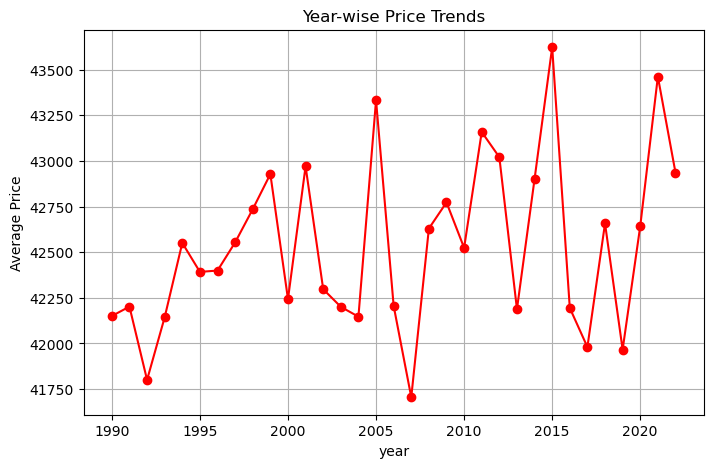

In [65]:
yearly_price= df.groupby("Year")["Price"].mean()
# plot year-wise price trends
plt.figure(figsize=(8,5))
yearly_price.plot(kind="line",marker="o",color='Red')
plt.xlabel('year')
plt.ylabel('Average Price')
plt.title("Year-wise Price Trends")
plt.grid()
plt.show()

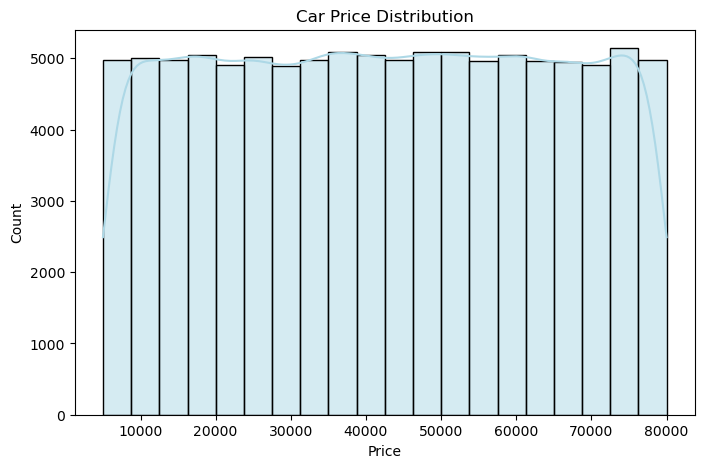

In [69]:
# Car Price Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'],bins=20,kde=True,color='lightblue')
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Car Price Distribution")
plt.show()

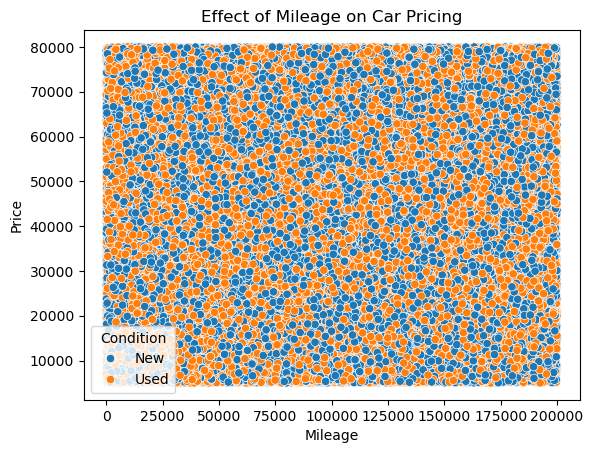

In [72]:
# Mileage vs Price Analysis
sns.scatterplot(x=df["Mileage"], y=df["Price"], hue=df["Condition"])
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Effect of Mileage on Car Pricing")
plt.show()

In [74]:
top_models = df.groupby("Model")["Price"].sum().sort_values(ascending=False).head(5)
print("\nTop-Selling Car Models:\n", top_models)



Top-Selling Car Models:
 Model
Generic Model 1    1.206275e+09
Generic Model 2    1.203919e+09
Generic Model 3    1.201510e+09
RAV4               3.830898e+07
F-150              3.823777e+07
Name: Price, dtype: float64


In [76]:
avg_price = df['Price'].mean()
print(f"\nAverage Car Price: ₹{avg_price:.2f}")



Average Car Price: ₹42534.52


In [7]:
df.to_csv("cleaned_car_sales.csv", index=False)

In [80]:
# Load CSV into Pandas
df = pd.read_csv("cleaned_car_sales.csv")
df.head()

,ID,Brand,Model,Year,Color,Mileage,Price,Condition
0,1,Mazda,Generic Model 3,2003,Blue,22932.0,65732.0,New
1,2,Jaguar,Generic Model 2,2003,Silver,89937.0,58620.0,New
2,3,Land Rover,Generic Model 2,2022,Green,36616.0,50574.0,New
3,4,Porsche,Generic Model 2,1997,Black,82812.0,35436.0,Used
4,5,Land Rover,Generic Model 3,2000,Black,184616.0,63880.0,Used


In [3]:
# train_model.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import joblib

# Load dataset
df = pd.read_csv('C:\\Users\\Dhusyath\\Downloads\\PROJECTS_DA\\PROJECTS_DA\\car product\\Car_Data.csv')

# Drop ID column if present
df = df.drop(columns=["ID"], errors="ignore")

# Encode categorical columns
label_encoders = {}
categorical_cols = ['Brand', 'Model', 'Color', 'Condition']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop(columns=["Price"])
y = df["Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model and encoders
joblib.dump(model, "car_price_model.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")


['feature_names.pkl']

In [2]:
df.head(50)

,Brand,Model,Year,Color,Mileage,Price,Condition
0,11,13,2003,1,22932,65732,0
1,6,12,2003,4,89937,58620,0
2,9,12,2022,2,36616,50574,0
3,14,12,1997,0,82812,35436,1
4,9,13,2000,0,184616,63880,1
5,14,12,1997,1,96785,42794,0
6,19,13,2003,4,177385,58082,1
7,2,13,1997,1,47226,31079,1
8,3,10,2003,0,176272,59437,1
9,5,13,2014,4,6153,27767,0
